## <h2 style="text-align: center;"><b>Sequence modeling with Recurrent Neural Networks</b>

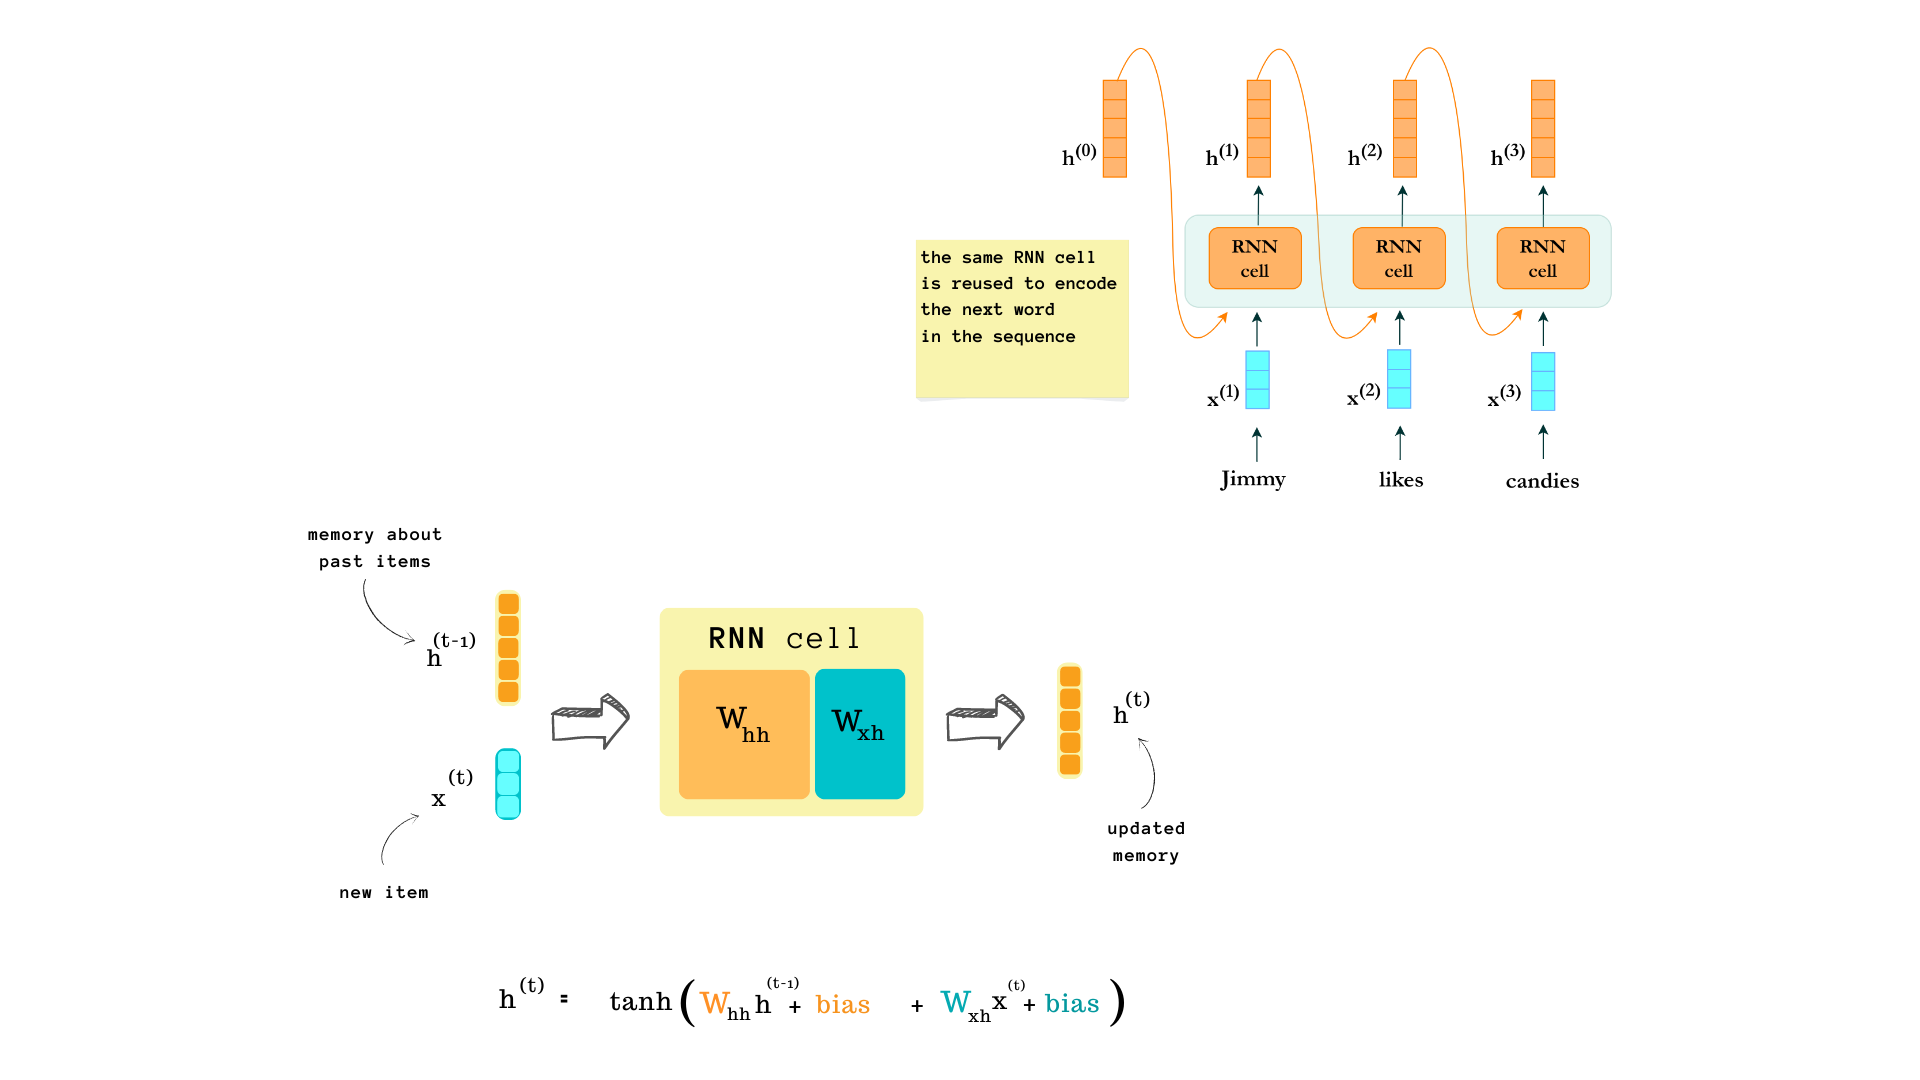

In [109]:
import torch
import torch.nn as nn

## <h6 style="text-align: center;"><b>Initialize Recurrent Layer</b>

In [410]:
import torch
import torch.nn as nn

rnn_layer = nn.RNN(input_size = 3,               # dimentionality of input tensor 
                   hidden_size = 5,              # number of features in the hidden state h
                   batch_first = True)           # input/output size: (batch_size, seq_len, nfeature) 

W_hh = rnn_layer.weight_hh_l0
W_xh = rnn_layer.weight_ih_l0
bias_hh = rnn_layer.bias_hh_l0
bias_xh = rnn_layer.bias_ih_l0

print("W_hh shape", W_hh.size())
print("W_xh shape", W_xh.size())
print("bias_xh shape", bias_xh.size())
print("bias_hh shape", bias_hh.size())

In [403]:
dict(rnn_layer.named_parameters())

{'weight_ih_l0': Parameter containing:
 tensor([[-0.3804, -0.4173,  0.4130],
         [ 0.3001,  0.0109,  0.4006],
         [-0.3831, -0.2680, -0.0815],
         [-0.2321, -0.1690, -0.1628],
         [-0.2130, -0.4023, -0.3060]], requires_grad=True),
 'weight_hh_l0': Parameter containing:
 tensor([[ 2.2483e-01, -2.7524e-02, -1.5331e-01, -9.6496e-02,  4.1486e-01],
         [ 2.2778e-01,  1.6881e-01, -6.7708e-02,  3.4053e-01,  4.3976e-01],
         [-1.4966e-01, -4.7228e-02,  3.1377e-01, -1.7082e-01,  4.2882e-01],
         [-4.0074e-01, -4.1542e-01,  2.7643e-02, -2.4467e-02,  3.8555e-04],
         [ 3.2978e-02,  1.2902e-01, -2.9487e-01, -6.7698e-02, -1.5248e-01]],
        requires_grad=True),
 'bias_ih_l0': Parameter containing:
 tensor([-0.3522, -0.0639,  0.1123,  0.4167, -0.0575], requires_grad=True),
 'bias_hh_l0': Parameter containing:
 tensor([ 0.4043, -0.0706,  0.1640,  0.1217, -0.1943], requires_grad=True)}

In [407]:
sentence = "Jimmy likes candies" 

# the input to the layer is the 3D tensor
embeddings_vectors = torch.tensor([[[ 0.8031,  0.2158, -0.7659],  # embedding vector for "jimmy"
                                    [-0.7203,  0.3244,  0.8265],   # embedding vector for "likes"
                                    [ 0.2350, -2.0558,  0.4325]]]) # embedding vector for "candies"

In [408]:
# we have one sequence made of 3 words and each word is represented with a 3-dim embedding vector
embeddings_vectors.shape

torch.Size([1, 3, 3])

    Rnn receives a sequence of word embeddings, loops over the sequence,
    considering 1 word at a time and computes one hidden state per each input word. 
    Stacks all hidden states and returns them as a single batch: hidden_states. 
    It also outputs the last hidden state, as a separate tensor.

In [ ]:
# compute sequence representation with RNN
hidden_states, last_hidden = rnn_layer(word_embeddings)

## <h6 style="text-align: center;"><b>Manual computation of hidden states</b>

In [82]:
outputs = []
prev_h = init_hidden_state

for t, word in enumerate(embeddings):
        
    # ((1, 3) @ (3, 5) + (1, 5)) + ((1, 3) @ (3, 5) + (1, 5))
    ht = torch.tanh((word @ W_xh.T + bias_xh) + (prev_h @ W_hh.T + bias_hh))

    outputs.append(ht.detach())
    prev_h = ht.detach()
    
    print(ht.detach().numpy())

[[[-0.49861208 -0.42278674 -0.3044196  -0.17340577  0.15271032]]]
[[[ 0.55869025 -0.30695352  0.5044909  -0.08634444 -0.43338636]]]
[[[ 0.5802086   0.3698186  -0.4684168   0.6089753  -0.47442713]]]


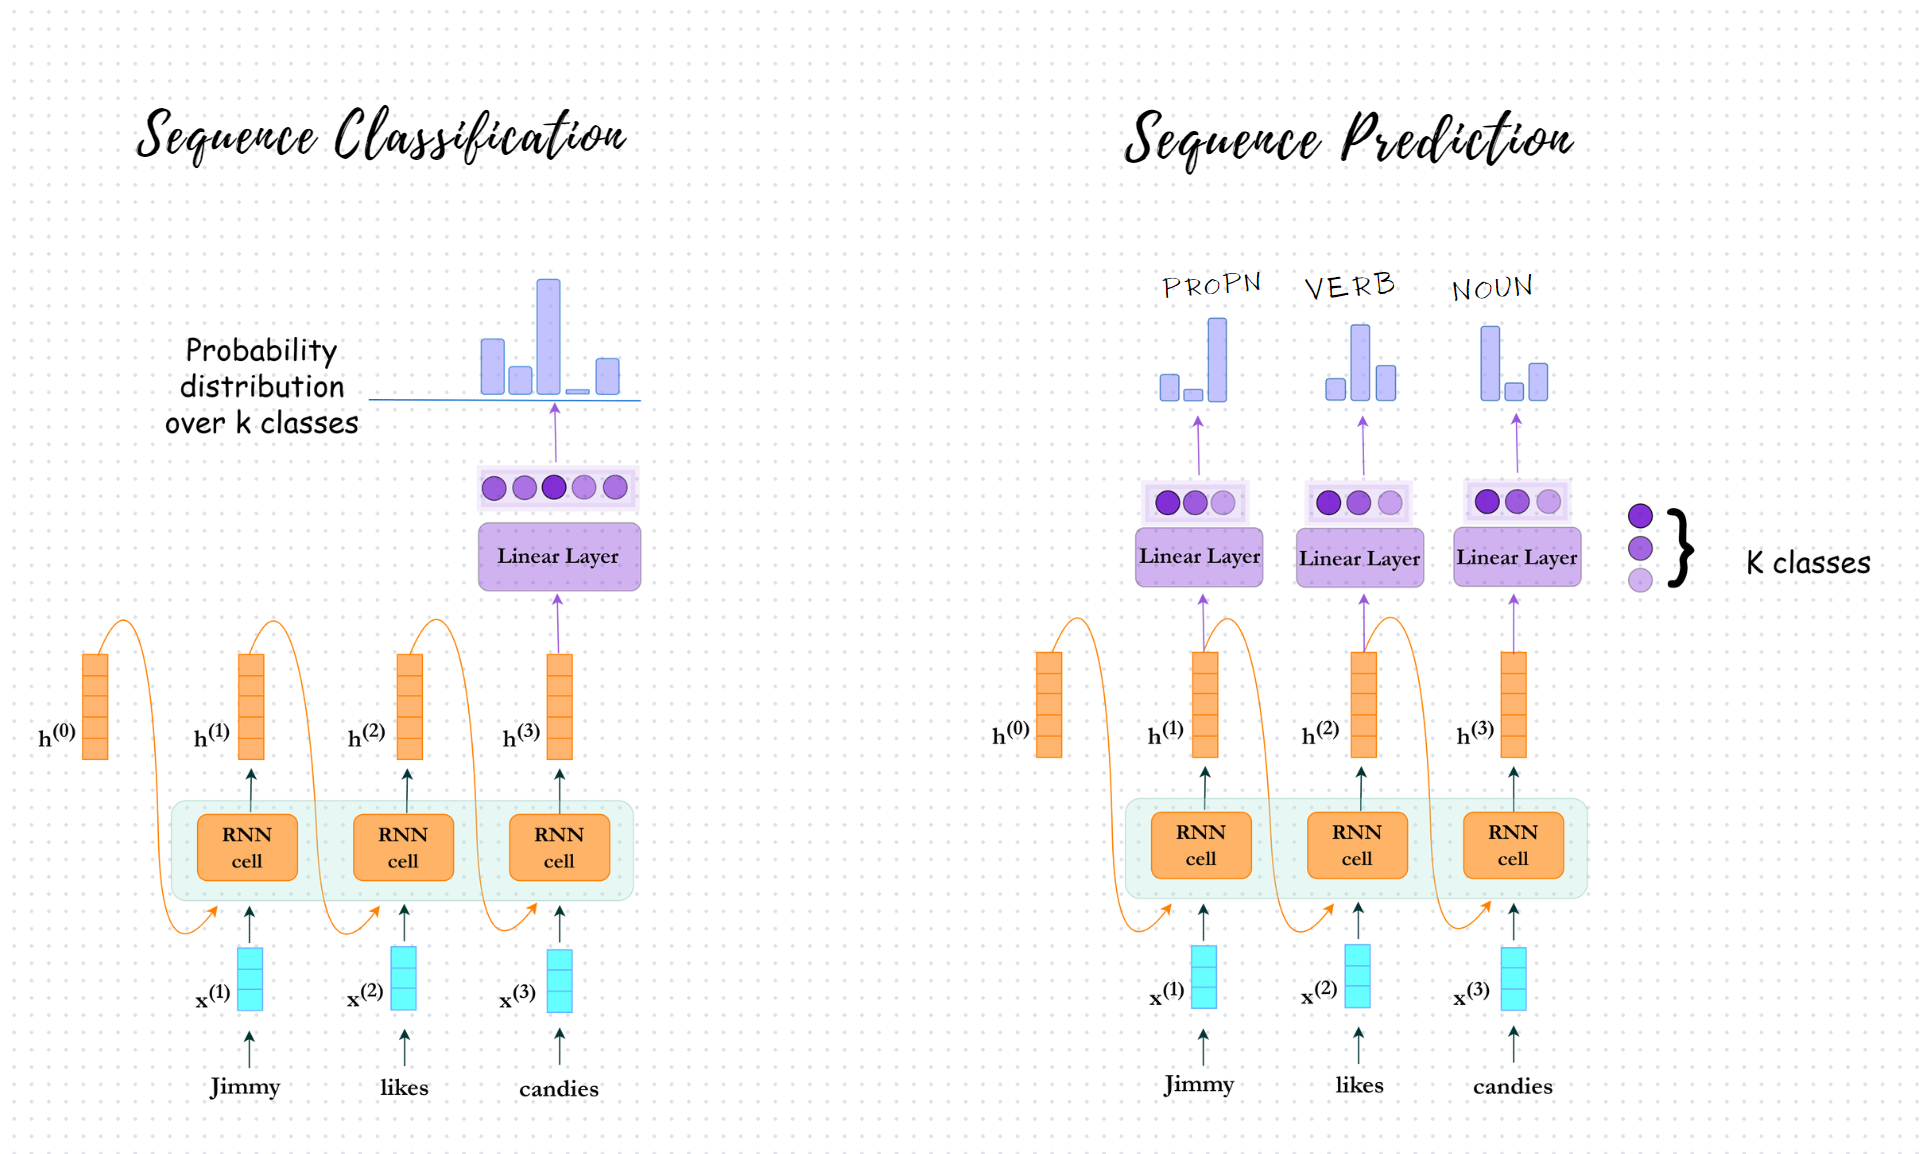

In [413]:
class SentimentRNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.rnn_layer = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear_layer = nn.Linear(hidden_size, num_classes)
        
    def forward(self, input_sequences):
        all_hidden_states, (last_hidden_state, last_cell_state) = self.rnn_layer(input_sequences)
        prediction_vector = self.linear_layer(last_hidden_state)
        return  prediction_vector

In [416]:
input_batch = torch.randn(3, 5, 100)

In [414]:
network = SentimentRNN(input_size=100, hidden_size=32, num_classes=1)
network

SentimentRNN(
  (rnn_layer): RNN(100, 32, batch_first=True)
  (linear_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [417]:
network(input_batch)

tensor([[[0.1372],
         [0.4117],
         [0.3248]]], grad_fn=<ViewBackward0>)